<a href="https://colab.research.google.com/github/ManojKumarKarumanchi/ML_CS403/blob/main/201123_lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Manoj Kumar Karumanchi

201123 CSE IV BTech

IIIT Tiruchirappali

### **Aim :** To implement a) Decision Tree classification and b) Decision Tree regression.

# Decision Tree - Classification

In [84]:
# import necessary libraries  -  ## https://homl.info/colab3

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [85]:
# Load the Iris dataset
iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

In [86]:
# Create and train a Decision Tree classifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [87]:
# Export the Decision Tree to a Graphviz file
export_graphviz(
  tree_clf,
  out_file="iris_tree.dot",
  feature_names=["petal length (cm)", "petal width (cm)"],
  class_names=iris.target_names,
  rounded=True,
  filled=True)

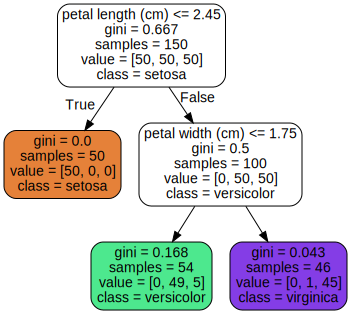

In [88]:
# Display the Decision Tree using Graphviz
Source.from_file("iris_tree.dot")

In [89]:
# Import libraries for plotting the decision boundaries
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [90]:
# Define the function
def plot_decision_boundary(X, y, tree_clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    colors = ['red', 'green', 'blue']  # Define colors for the three classes (Setosa, Versicolor, Virginica)
    class_names = ['Setosa', 'Versicolor', 'Virginica']  # Custom class names

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(colors))

    for i, color, class_name in zip(np.unique(y), colors, class_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], c=color, label=class_name)

    plt.xlabel("Petal Length (cm)")
    plt.ylabel("Petal Width (cm)")

    plt.legend()
    plt.title("Decision Tree Classification Boundaries")

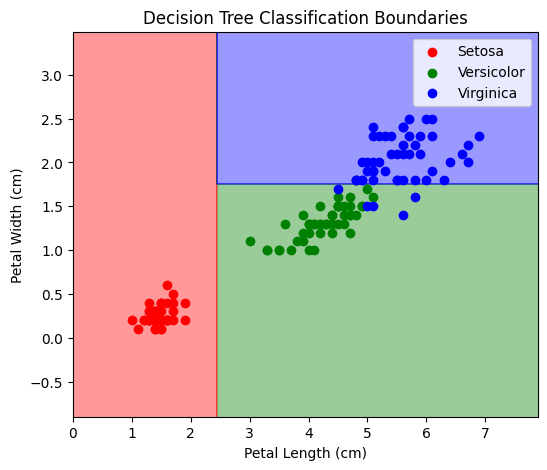

In [91]:
# Plot the decision boundary with class label coloring
plt.figure(figsize=(6, 5))
plot_decision_boundary(X_iris, y_iris, tree_clf)
plt.show()

In [92]:
# Make predictions on the test data
y_pred = tree_clf.predict(X_iris)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [93]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_iris, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 96.0


In [94]:
# Generate a classification report
classification_rep = classification_report(y_iris, y_pred, target_names=iris.target_names, digits=2)
print("\nClassification Report: \n")
print(classification_rep)


Classification Report: 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.91      0.98      0.94        50
   virginica       0.98      0.90      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [95]:
# Generate a confusion matrix
confusion = confusion_matrix(y_iris, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]


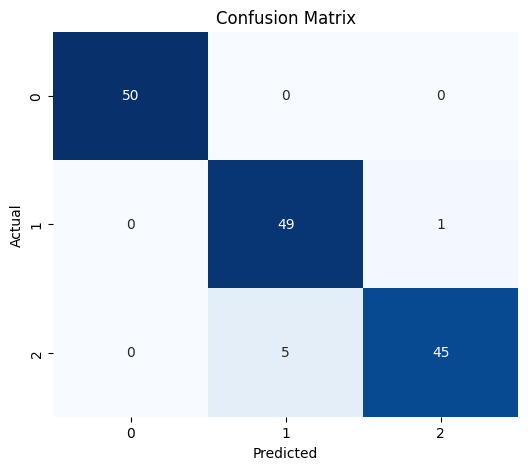

In [96]:
# Visualising the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate the confusion matrix
confusion = confusion_matrix(y_iris, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Decision Tree - Regression

In [97]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [98]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [99]:
np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5 # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [100]:
# Export the Decision Tree to a Graphviz file
export_graphviz(
  tree_clf,
  out_file="iris_tree.dot",
  feature_names=["petal length (cm)", "petal width (cm)"],
  class_names=iris.target_names,
  rounded=True,
  filled=True)

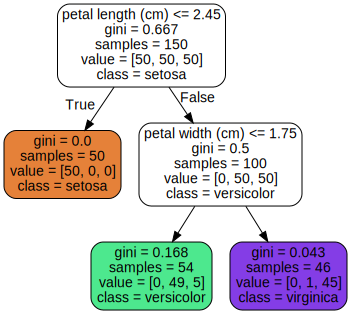

In [101]:
# Display the Decision Tree using Graphviz
Source.from_file("iris_tree.dot")

In [102]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Train the regressor on the training data
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [104]:
# Make predictions on the test data
y_pred = tree_reg.predict(X_test)
y_pred

array([1.02702703, 0.        , 1.88372093, 1.02702703, 1.88372093,
       0.        , 1.02702703, 1.88372093, 1.02702703, 1.02702703,
       1.88372093, 0.        , 0.        , 0.        , 0.        ,
       1.02702703, 1.88372093, 1.02702703, 1.02702703, 1.88372093,
       0.        , 1.88372093, 0.        , 1.88372093, 1.88372093,
       1.88372093, 1.88372093, 1.88372093, 0.        , 0.        ])

In [105]:
 #Calculate the Mean Squared Error and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse*100)
print("\nR-squared (R2) Score:", r2*100)

Mean Squared Error: 3.1184513559208424

R-squared (R2) Score: 95.53798693111484


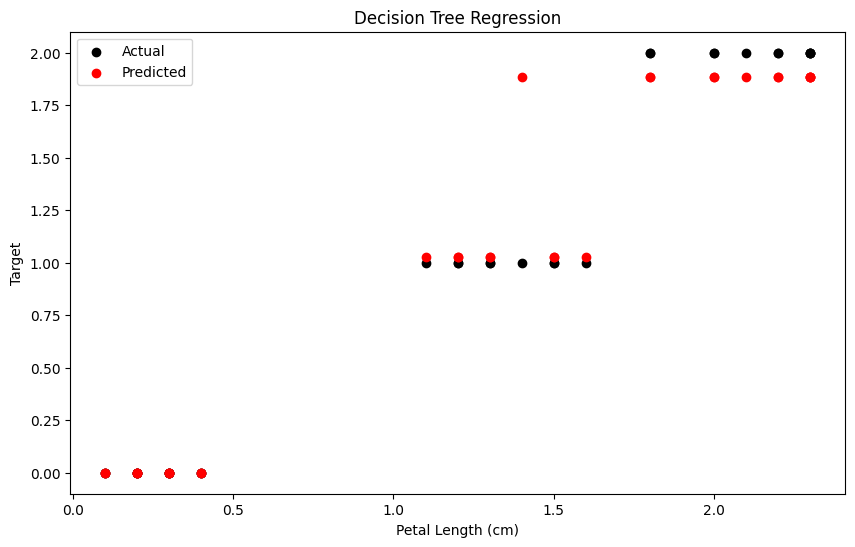

In [106]:
# Visualize the Decision Tree
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 3], y_test, color='black', label='Actual')
plt.scatter(X_test[:, 3], y_pred, color='red', label='Predicted')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Target")
plt.legend()
plt.title("Decision Tree Regression")
plt.show()

**Conclusion :** These metrics show that the Decision Tree regression model is performing well in predicting petal length based on the features in the Iris dataset.